##### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import sys
sys.path.append('./')
import optical_imaging as oi
import oi_file
import cine

##### Files

In [2]:
file_path = '/home/preston/Desktop/Science/Research/cancer_cells/data/10-18-2016/hct-116_mcell_20_50_20_pr0020_0000.cine'
vid = cine.Cine(file_path)

In [3]:
index = 10000
raw_template_frame = vid.get_frame(0, average = False)
raw_frame = vid.get_frame(10000, average = False)

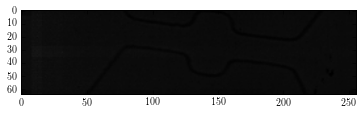

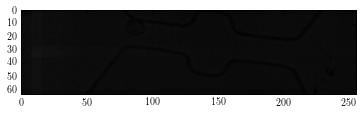

In [4]:
plt.imshow(raw_template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

plt.imshow(raw_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

##### Adjust image contrast and brightness

In [5]:
alpha = 200
template_frame = oi_file.change_frame_contrast(raw_template_frame, alpha = alpha)
frame = oi_file.change_frame_contrast(raw_frame, alpha = alpha)
neg_frame = oi_file.change_frame_contrast(abs(frame - template_frame), alpha = 1)

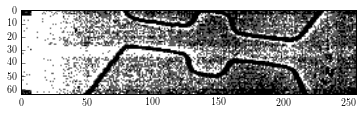

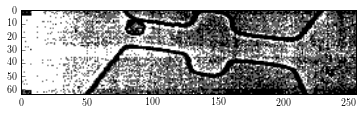

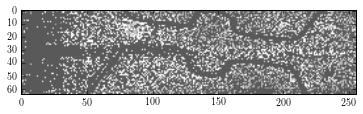

In [6]:
plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

plt.imshow(neg_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

##### Gaussian blur

In [7]:
template_frame = cv2.GaussianBlur(template_frame, (5,5), 0)
frame = cv2.GaussianBlur(frame, (5,5), 0)

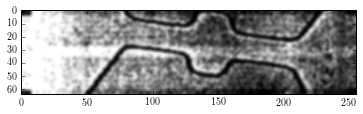

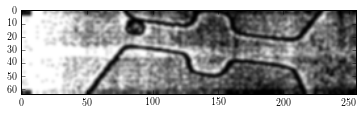

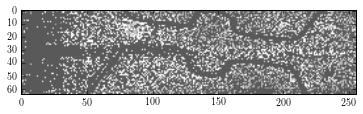

In [8]:
plt.imshow(template_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

plt.imshow(neg_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

##### Find clusters

In [39]:
threshold_difference = .2
cluster_threshold = 100

In [40]:
clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                             cluster_threshold = cluster_threshold)
print len(clusters)

1


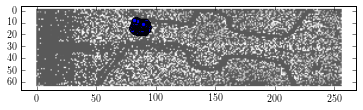

In [41]:
plt.imshow(neg_frame, cmap = 'gray', vmin = 0, vmax = 1)
plt.scatter(clusters[0][:,1], clusters[0][:,0])
plt.show()

### Plot 